<center>
# Algèbre linéaire randomisée

In [1]:
%matplotlib inline
from math import *
import numpy as  np  
import scipy as sp
from pylab import *


# Exercice 1

Dans cet exercice, nous étudions l'estimation de la norme euclidienne $\Vert x \Vert_2$ d'un vecteur $x \in \mathbb{R}^n$ par $\Vert  Sx \Vert_2$ où $S \in \mathbb{R}^{k \times n}$ est une matrice aléatoire.


>**Question 0.** Générer un vecteur <code>x</code> dans $\mathbb{R}^n$ selon la loi uniforme sur la sphère unité de $\mathbb{R}^n$ (tirer pour cela selon la loi gaussienne standard sur $\mathbb{R}^n$ et normaliser le vecteur obtenu). On prendra $n=2000$.  

In [76]:
n = 2000
x = np.random.randn(n)
x = x / np.linalg.norm(x)


1.0


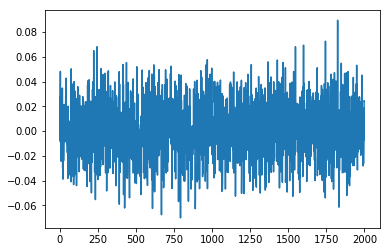

In [77]:
plot(x)
print(norm2(x))

>**Question 1**. On considère tout d'abord le cas d'une matice $S$ avec des entrées i.i.d. $\mathcal{N}(0,1/k)$. 
Pour $k=25,50,100$  et $200$, estimer la probabilité $\mathbb{P}(\vert \Vert Sx \Vert_2^2 - 1 \vert > \epsilon)$ pour $\epsilon=0.2$. Pour cela, pour chaque valeur de $k$, on effectuera $N_s = 100$ tirages de $\Vert Sx \Vert_2$ et on calculera la fréquence de l'évévement $\{\vert \Vert Sx \Vert_2 - 1 \vert > \epsilon\}.$

In [78]:
print("Matrice à entrées iid selon loi gaussienne ")

Ns = 100 
kList = [25, 50, 100, 200]
pe = np.zeros(len(kList))
c = 0
epsilon = .2

for k in kList:
    error = np.zeros(Ns)
    for i in range(Ns):
        P = 1. / sqrt(k) * np.random.randn(k,n)
        Px = np.dot(P,x)
        error[i] = np.abs(np.linalg.norm(Px)**2 - 1)
    pe[c] = sum(error>epsilon) / Ns
    c = c + 1
    
print("Probabilité d'echec pe : ", pe, "  pour k = ",kList)

Matrice à entrées iid selon loi gaussienne 
Probabilité d'echec pe :  [ 0.31  0.41  0.14  0.05]   pour k =  [25, 50, 100, 200]


>**Question 2**. Déterminer la valeur de $k$ suffisante pour avoir $\mathbb{P}(\vert \Vert Sx \Vert_2^2 - 1 \vert > \epsilon) \le \delta$ pour $\epsilon=0.5$ et $\delta=0.2$. Vérifier que cette condition est bien respectée en estimant la probabilité de l'événement à partir de $N_s=1000$ réalisations. 

Application du cours

In [79]:
Ns = 1000
epsilon = .5
delta = .001
gamma = 1
k = int( np.ceil( 8 * (gamma**2) / (epsilon**2) * log( 2 / delta) ) )


error = np.zeros(Ns)
for i in range(Ns):
    P = 1. / sqrt(k) * np.random.randn(k,n)
    Px = np.dot(P,x)
    error[i] = np.abs(np.linalg.norm(Px)**2 - 1)
pe = sum(error>epsilon) / Ns

print("Probabilité d'echec pe : ", pe, "  pour k = ",k)

Probabilité d'echec pe :  0.0   pour k =  244


>**Question 3** On considère maintenant une matrice $S$ avec des entrées i.i.d. prenant les valeurs $-\sqrt{\frac{r}{k}},0,\sqrt{\frac{r}{k}}$ avec pour probabilités respectives $\frac{1}{2r},1-\frac{1}{r},\frac{1}{2r}$. Reprendre la question 1 en considérant le cas $r=1$ et $r=2$. On pourra utiliser la fonction [numpy.random.choice](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html).

In [80]:

def GenSr(n, k, r):
    return np.random.choice( [-sqrt(r / k), 0, sqrt(r / k)], (k,n), p=[1 / (2 * r), 1 - 1 / r, 1 / (2 * r)])

Ns = 100
epsilon = .2

for r in [1, 2]:
    kList = [25, 50, 100, 200]
    pe = np.zeros(len(kList))
    for k in kList:
        error = np.zeros(Ns)
        for i in range(Ns):
            P = GenSr(n, k, r)
            Px = np.dot(P,x)
            error[i] = np.abs(np.linalg.norm(Px)**2 - 1)
        pe = sum(error>epsilon) / Ns
        print("r :", r, ", k :", k, ", proba d'échec", pe)

r : 1 , k : 25 , proba d'échec 0.51
r : 1 , k : 50 , proba d'échec 0.31
r : 1 , k : 100 , proba d'échec 0.19
r : 1 , k : 200 , proba d'échec 0.06
r : 2 , k : 25 , proba d'échec 0.38
r : 2 , k : 50 , proba d'échec 0.31
r : 2 , k : 100 , proba d'échec 0.15
r : 2 , k : 200 , proba d'échec 0.04



>**Question 3.** On considère ici une matrice $S$ avec des colonnes indépendantes où la colonne $j$ est telle que $S_{ij} = \epsilon_j \delta_{I_j,i}$ où $I_j$ est une variable uniforme sur $\{1,\dots,k\}$ et $\epsilon_j$ une variable de Rademacher indépendante de $I_j$. Cette matrice, appelée CountSketch, n'a qu'une seule valeur non nulle par colonne. Reprendre la question 1 et comparer les résultats pour les différents choix de matrice. 

In [81]:
def Rademacher():
    return np.random.choice( [-1, 1], 1, p=[1 / 2, 1 / 2 ])

CountSketch = np.zeros((k ,n))

for i in arange(n):
    j = np.random.randint(0, k)
    CountSketch[j, i] = Rademacher()
CountSketch = CountSketch / sqrt(n)


print (linalg.norm(CountSketch))

1.0


In [91]:
print("Matrice CountSketch")
n = 5
Ns  = 4
epsilon = .2
#kList = [25, 50, 100, 200]
kList = [10]

x = np.random.randn(n)
x = x / np.linalg.norm(x)

pe = np.zeros(len(kList))

for k in kList:
    error = np.zeros(Ns)
    for i in range(Ns):
        E = np.random.choice(np.array([-1, 1]), n)
        I = np.random.choice(range(k), n)
        P = np.zeros((k,n))
        for j in range(n):
            P[I[j], j] = E[j]
        Px = np.dot(P,x)
        error[i] = np.abs(np.linalg.norm(Px)**2 - 1)
        print(P)
    pe = sum(error>epsilon) / Ns
    print( "k = ", k, ", proba d'échec :", pe)
    


Matrice CountSketch
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 1.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]
[[ 0.  0.  0.  0.  0.]
 [-1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]]
k =  10 , proba d'échec : 0.25


# Exercice 2

Dans cet exercice, nous étudions l'estimation de la norme $\Vert x \Vert_2$ d'un vecteur $x \in \mathbb{R}^{n}$ 
à partir d'un tirage d'un sous-ensemble de ses composantes. On considère tout d'abord l'estimation
$$
\Vert x \Vert_2^2  \approx \frac{1}{k} \sum_{l=1}^k n x_{I_l}^2 := N_k(x)
$$
où les $I_l$ sont des variables indépendantes à valeurs dans $\{1,\dots,n\}$. L'estimateur peut s'écrire 
 $$N_k(x) = \Vert Sx \Vert_2^2 $$
où $S$ est une matrice aléatoire avec des lignes indépendantes contenant chacune 
une et une seule valeur non nulle tirée aléatoirement dans $\{-\sqrt{\frac{n}{k}},\sqrt{\frac{n}{k}}\}$.


>**Question 1.** Créer une fonction <code>estimate_norm_sampling(x,k)</code> qui prend en argument un vecteur $x$ et un entier $k$ et qui retourne l'estimateur $N_k(x)$.

In [108]:
n = 2000

x = np.random.randn(n)

print("Norme de x :", linalg.norm(x))

Norme de x : 43.6429357028


In [95]:
size(x)

2000

In [113]:
def estimate_norm_sampling(x, k):
    n = size(x)
    I = np.random.choice(range(k), n)
    nkx = np.linalg.norm(x[I] * sqrt(n) / sqrt(k))
    return nkx

K = arange(1, n+1)
Nor = np.zeros(n)
for k in K:
    Nor[k-1] = estimate_norm_sampling(x, k)



43.759655724055712

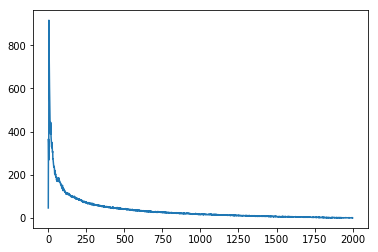

In [114]:

plot(K, np.abs(Nor-linalg.norm(x)))
Nor[2000-1]

>**Question 2.** On considère un vecteur $x\in\mathbb{R}$ tel que $x_i = \exp(-\alpha^2 (\frac{i-1}{n-1}-\frac{1}{2})^2)$ avec $n=100000$. Estimer la probabilité que $\vert N_k(x) - \Vert x \Vert_2^2 \vert > \epsilon \Vert x \Vert_2^2$ avec $\epsilon=0.1$, $k=10$, et pour $\alpha =0,1,2,4,8$. On utilisera pour cela $N_s=1000$ échantillons de $N_k(x)$ et on calculera la fréquence de l'événement $\{\vert N_k(x) - \Vert x \Vert_2^2 \vert > \epsilon \Vert x \Vert_2^2\}.$

In [ ]:
n = 100000
k = 10
Ns = 1000
epsilon = .1
alphalist = [0, 1, 2, 4, 8]

for alpha in alphalist:
    x = np.array([exp(- alpha**2 * ((i-1)/(n-1) - 1/2.)**2)])
    nx = np.linalg.norm(x)
    

On considère maintenant l'estimateur $$
 N_k^p(x) = \frac{1}{k}\sum_{l=1}^k p_{I_l}^{-1}  x_{I_l}^2 
$$
où les $I_l$ sont des variables i.i.d. à valeurs dans $\{1,\dots,n\}$ telles que $\mathbb{P}(I_l = i) = p_i$. 

>**Question 3.** Vérifier que  $N_k^p(x)$ est un estimateur sans biais de $\Vert x \Vert^2_2.$ Créer une fonction <code>estimate_norm_sampling_p(x,k,p)</code> qui prend en argument un vecteur $x$, un entier $k$ et un vecteur $p$ de taille $n$ et qui retourne l'estimateur $N_k^p(x)$. 

>**Question 4.** Vérifier que l'estimateur $N_k^p(x)$ est de variance minimale pour $p_i^\star = \lambda x_i^2 $ pour une certaine constante $\lambda$ que l'on précisera. Effectuer la même analyse que dans la question 2 avec l'estimateur $N_k^{p^\star}(x)$ puis avec l'estimateur $N_k^p(x)$ où $p = p^\star + \frac{0.2}{n} q $ où $q$ est un tirage d'un vecteur aléatoire à entrées indépendantes uniforme sur $(0,1).$